# Average number of form fields which have data

In [30]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import fontManager

path = "../datasets.jsonl"
font_path = "../TaipeiSansTCBeta-Regular.ttf"

fontManager.addfont(font_path)
mpl.rc('font', family='Taipei Sans TC Beta')

o_dataset = []
with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_dataset.append(data)
print(o_dataset[:2])

[{'author': '蔡韋漢', 'author_email': None, 'contact_email': 'hank89520@gmail.com', 'contact_person': '蔡韋漢', 'created_time': '2023-08-08', 'creator_user_id': 'b463adf3-d71e-4c46-abe0-016a72eac751', 'data_type': ['archive'], 'end_time': '2023-08-08', 'groups': [], 'id': 'f7cc490c-df6d-4c74-85e6-da3af9f7dc38', 'isopen': True, 'keywords': ['Q64481569'], 'language': ['zho'], 'license_id': 'pd', 'license_title': 'Public Domain', 'license_url': 'https://creativecommons.org/publicdomain/mark/1.0/', 'maintainer': None, 'maintainer_email': None, 'metadata_created': '2023-08-08T07:00:16.070724', 'metadata_modified': '2023-08-08T07:01:58.168807', 'name': '50fa6', 'notes': '', 'num_resources': 1, 'num_tags': 1, 'organization': None, 'private': False, 'process_step': '', 'relationships_as_object': [], 'relationships_as_subject': [], 'remarks': '', 'resources': [{'cache_last_updated': None, 'cache_url': None, 'created': '2023-08-08T07:01:54.950611', 'datastore_active': False, 'datastore_contains_all_re

In [31]:
basic_field = ['title','url','notes','data_type','keywords','tags','langauge','remarks']
manage_field = ['license_id','author','process_step','contact_person','contact_email','owner_org']
time_field = ['temp_res','start_time','end_time','spatial','x_min','x_max','y_min','y_max','spatial_res']
resource_field = ['url','name']

total = 0
count_basic = 0
count_manage = 0
count_time = 0
count_re = 0

for i in o_dataset:  #基本資訊
  total += 1
  count_basic += sum(1 for field in basic_field if i.get(field) is not None and i[field]!='') #有時不會有欄位，先確保有欄位再拿值

percent_basic = (count_basic / total) / 8

for i in o_dataset:  #管理資訊
  count_manage += sum(1 for field in basic_field if i.get(field) is not None and i[field]!='')
  if i['resources']:
    count_manage += (1 if i['resources'][0]['created'] !='' else 0)

percent_manage = (count_manage / total) / 7

for i in o_dataset:  #時空資訊
  count_time += sum(1 for field in time_field if i.get(field) is not None and i[field]!='')

percent_time = (count_time / total) / 9

for i in o_dataset: #資源層級

  count_re += sum(1 for field in resource_field if i.get(field) is not None and i[field]!='')
  if i['resources']:
    count_re += (1 if i['resources'][0]['format'] !='' else 0)
  if i['organization']:
    count_re += (1 if i['organization']['description'] !='' else 0)

percent_re = (count_re / total) / 4

total_data = count_basic + count_manage + count_time + count_re
percent_total = (total_data / total) / 28

## 各項後設資料填答比率

average of basic 4.83    percent of basic: 60.36 %
average of manage 5.82    percent of manage: 83.18 %
average of time 2.02    percent of time: 22.43 %
average of resource 2.72    percent of resource: 67.99 %
average 15.39    percent: 54.96 %


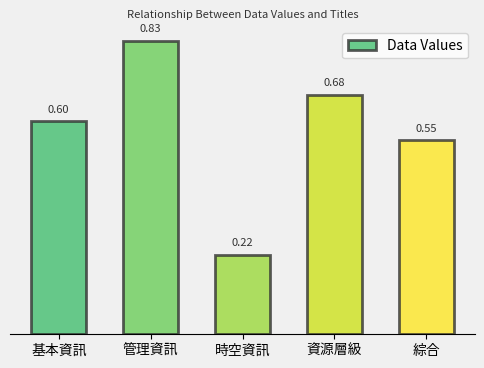

In [32]:
print('average of basic',round(count_basic/total,2),'   percent of basic:', round(percent_basic*100, 2), "%")
print('average of manage',round(count_manage/total,2),'   percent of manage:', round(percent_manage*100, 2), "%")
print('average of time',round(count_time/total,2),'   percent of time:', round(percent_time*100, 2), "%")
print('average of resource',round(count_re/total,2),'   percent of resource:', round(percent_re*100, 2), "%")
print('average',round(total_data/total,2),'   percent:', round(percent_total*100, 2), "%")


data = [percent_basic,percent_manage,percent_time,percent_re,percent_total]
titles = ['基本資訊', '管理資訊','時空資訊', '資源層級', '綜合']

fig, ax = plt.subplots(figsize=(6, 4)) # Create a figure and axis

fig.patch.set_facecolor('#f0f0f0') # Set background color
ax.set_facecolor('#f0f0f0')

# Create a gradient of colors
colors = plt.cm.viridis(np.linspace(0.7, 1, len(data)))

# Create the bar plot with rounded bars, shadows, and gradient colors
bars = ax.bar(titles, data, color=colors, align='center', width=0.6, edgecolor='#333333', linewidth=2, alpha=0.8, label='Data Values', zorder=2)

ax.set_title('Relationship Between Data Values and Titles', fontsize=8, color='#333333')


# Add data labels with custom font and size
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8, color='#333333')

# Add legend
ax.legend()

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.yticks([])
plt.show()